In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
euro = pd.read_csv('datasets/hourly_electricity_prices_euro_2022.csv')

In [103]:
euro

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67
...,...,...,...,...,...,...,...,...
8756,2022/12/31,19:00 - 20:00,18.11,333.00,22.09,18.11,228.00,-1.01
8757,2022/12/31,20:00 - 21:00,7.60,310.00,10.55,7.60,204.38,-1.39
8758,2022/12/31,21:00 - 22:00,3.69,270.00,5.22,3.69,175.23,-1.04
8759,2022/12/31,22:00 - 23:00,1.88,217.78,2.39,1.88,177.39,-1.07


In [104]:
euro.date = pd.to_datetime(euro.date)

In [105]:
def hour(time):
    window = str(time).split(' ')[0]
    window = pd.to_datetime(window, format='%H:%M')
    return window
euro.hour = euro.hour.apply(hour).dt.time

In [106]:
euro.describe()

,date,france,italy,belgium,spain,uk,germany
count,8761,8760.000000,8760.000000,8760.000000,8760.000000,7319.000000,8760.000000
mean,2022-07-02 00:19:43.426549504,275.878425,307.581382,244.531733,167.521917,223.205879,235.446143
min,2022-01-01 00:00:00,-1.440000,1.000000,-100.000000,0.000000,-30.000000,-19.040000
25%,2022-04-02 00:00:00,183.030000,211.875000,157.717500,125.000000,146.000000,134.197500
50%,2022-07-02 00:00:00,239.335000,266.645000,219.810000,163.545000,207.980000,208.340000
75%,2022-10-01 00:00:00,350.000000,385.000000,315.085000,206.402500,285.210000,310.080000
max,2022-12-31 00:00:00,2987.780000,871.000000,871.000000,700.000000,705.470000,871.000000
std,NaN,145.825722,136.959856,134.657307,69.441349,112.921872,142.809409


In [107]:
max_value_index = euro['france'].idxmax()
euro.iloc[max_value_index]

date       2022-04-04 00:00:00
hour                  08:00:00
france                 2987.78
italy                    470.0
belgium                  230.0
spain                   286.08
uk                      209.72
germany                 101.16
Name: 2240, dtype: object

In [108]:
euro.loc[euro.date == '2022-07-15']

,date,hour,france,italy,belgium,spain,uk,germany
4680,2022-07-15,00:00:00,350.00,425.27,350.00,145.00,NaN,350.00
4681,2022-07-15,01:00:00,320.07,415.00,320.07,142.45,NaN,320.07
4682,2022-07-15,02:00:00,308.18,400.00,308.86,138.00,NaN,298.49
4683,2022-07-15,03:00:00,305.01,394.06,305.01,135.05,NaN,305.01
4684,2022-07-15,04:00:00,307.55,389.21,307.55,135.40,NaN,307.55
4685,2022-07-15,05:00:00,330.00,400.00,330.00,140.00,NaN,330.00
4686,2022-07-15,06:00:00,404.90,428.48,404.90,139.99,NaN,404.90
4687,2022-07-15,07:00:00,429.92,444.45,429.92,145.00,NaN,429.92
4688,2022-07-15,08:00:00,418.80,456.17,417.33,147.90,NaN,416.65
4689,2022-07-15,09:00:00,425.05,444.45,373.72,143.06,NaN,334.06


In [109]:
euro = euro.dropna(how='any')

In [110]:
euro.head()

,date,hour,france,italy,belgium,spain,uk,germany
0,2022-01-01,00:00:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022-01-01,01:00:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022-01-01,02:00:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022-01-01,03:00:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022-01-01,04:00:00,37.67,104.00,37.67,97.80,-0.01,37.67


In [111]:
# euro['datetime'] = pd.to_datetime(euro.date.dt.strftime('%Y-%m-%d') + ' ' + euro.hour.astype(str))
euro.set_index('date', inplace=True)

In [112]:
euro_daily = euro[['france', 'italy', 'belgium', 'spain', 'uk', 'germany']].resample('D').mean()
euro_daily

,france,italy,belgium,spain,uk,germany
date,,,,,,
2022-01-01,87.080833,150.689167,85.675000,122.629167,68.842500,82.578333
2022-01-02,49.116250,166.910000,50.619583,136.968333,58.329167,47.353750
2022-01-03,92.122083,192.664167,79.404167,150.498333,86.688750,76.107083
2022-01-04,156.298333,165.726667,156.280000,152.145417,181.072917,153.916667
2022-01-05,185.556667,192.537917,155.747917,180.200000,234.993750,107.868333
...,...,...,...,...,...,...
2022-12-27,122.794167,209.479583,119.485000,109.492500,165.700417,91.734167
2022-12-28,51.537083,175.791667,51.046250,41.410833,164.169167,45.897083
2022-12-29,31.525833,205.406250,33.221667,16.187500,90.697083,13.578750


<Axes: >

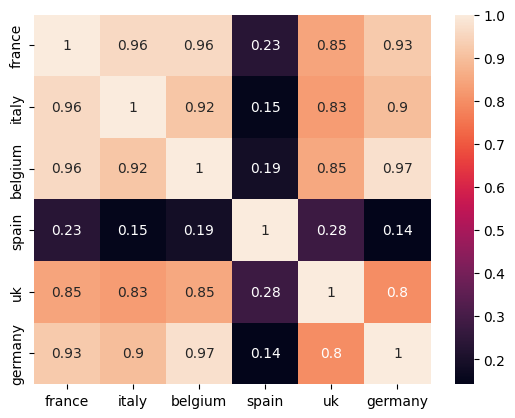

In [113]:
sns.heatmap(euro_daily[['france', 'italy', 'belgium', 'spain', 'uk', 'germany']].corr(), annot = True)